In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace 'data.csv' with your actual data file)
data = pd.read_csv('/Users/manishghoshal/Downloads/Futurense_Internship-main/Final Internship Capstone Project/Financial Analytics/financialanalytics.csv')



In [5]:
# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index
data.set_index('Date', inplace=True)

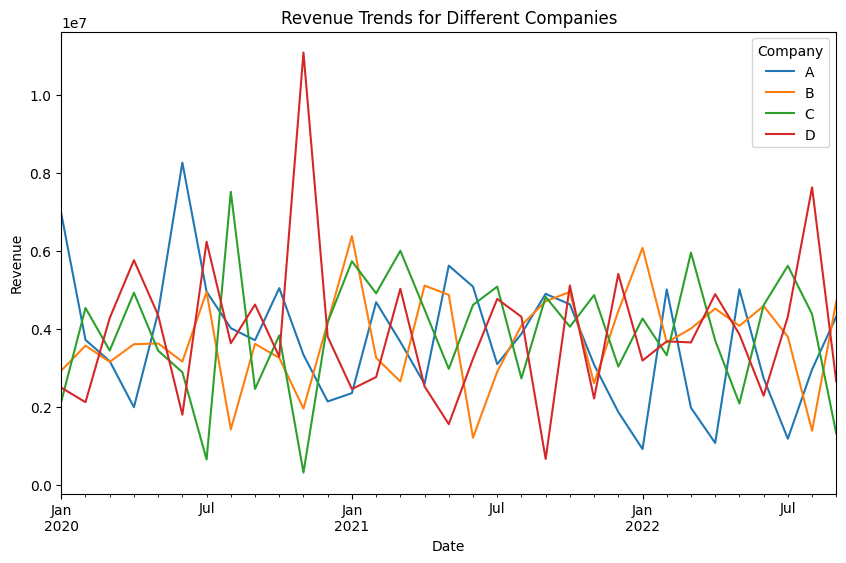

In [6]:
# Analyze trends of revenue for each company
company_revenue = data.groupby('Company')['Revenue'].resample('M').sum().unstack('Company')
company_revenue.plot(figsize=(10, 6))
plt.title('Revenue Trends for Different Companies')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Company')
plt.show()

In [7]:
# Identify the company with the highest revenue in a given month
monthly_revenue = data.resample('M')['Revenue'].sum()
highest_revenue_month = monthly_revenue.idxmax().month
highest_revenue_company = data[data.index.month == highest_revenue_month]['Company'].value_counts().idxmax()
print(f"The company with the highest revenue in month {highest_revenue_month} is {highest_revenue_company}.")


The company with the highest revenue in month 10 is A.


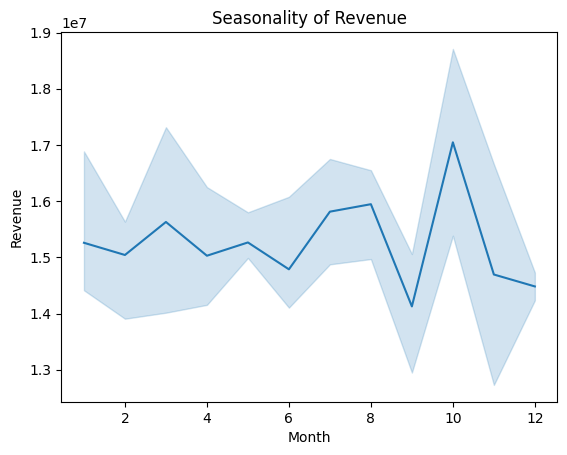

In [8]:
# Determine if there's any seasonality in the data
seasonal_plot = sns.lineplot(x=monthly_revenue.index.month, y=monthly_revenue.values)
seasonal_plot.set_title('Seasonality of Revenue')
seasonal_plot.set_xlabel('Month')
seasonal_plot.set_ylabel('Revenue')
plt.show()